In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\chint\\Desktop\\DATA SCIENCE FILES\\DEEP LEARNING ASSIGNMENTS\SA\\Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
new_df = df[['airline_sentiment', 'airline', 'text']].copy()
new_df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [5]:
new_df.dtypes

airline_sentiment    object
airline              object
text                 object
dtype: object

In [6]:
new_df.shape

(14640, 3)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   text               14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB


C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

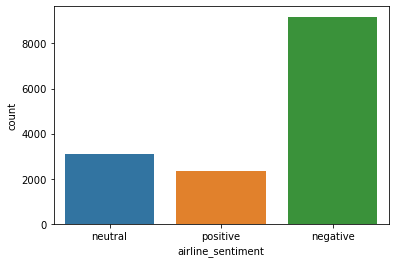

In [8]:
sns.countplot(new_df['airline_sentiment'])

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

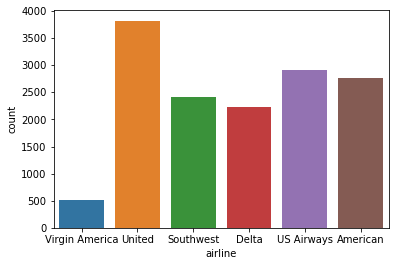

In [18]:
sns.countplot(new_df['airline'])

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

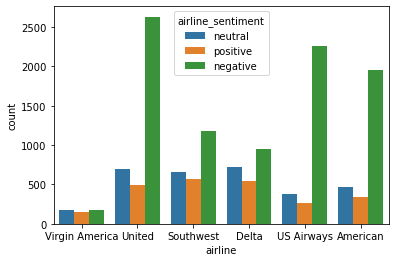

In [19]:
sns.countplot(new_df['airline'], hue=new_df['airline_sentiment'])

In [9]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [11]:
# initializing the lists

clean_tweet_lst = []

tweet_len_lst = []

In [12]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    
    tweet_len_lst.append(len(words))

In [13]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [14]:
clean_tweet_lst = []

tweet_len_lst = []

new_df['text'].progress_apply(lambda x: preprocess(x, 'stem'))

new_df['clean_tweet_stem'] = clean_tweet_lst

new_df['tweet_length_stem'] = tweet_len_lst

100%|███████████████████████████████████████████████████████████████████████████| 14640/14640 [01:00<00:00, 242.67it/s]


In [15]:
# Preparing the target variable

new_df['sentiment']=new_df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

new_df.head()

,airline_sentiment,airline,text,clean_tweet_stem,tweet_length_stem,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,6,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,8,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,11,0
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,5,0


In [16]:
new_df.drop(['airline_sentiment'], axis = 1, inplace=True)

In [17]:
new_df['sentiment'].value_counts()

0    9178
1    5462
Name: sentiment, dtype: int64

In [18]:

y = new_df['sentiment']
X = new_df['clean_tweet_stem']

In [19]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, \
                                                    random_state=0)

In [20]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(10248,) (10248,)
(4392,) (4392,)


In [22]:
# train_clean_tweet=[]
# for tweet in X_train['clean_tweet_stem']:
#     train_clean_tweet.append(tweet)

# test_clean_tweet=[]
# for tweet in X_test['clean_tweet_stem']:
#     test_clean_tweet.append(tweet)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(X_train)

test_features = vectorizer.transform(X_test)

In [24]:
vectorizer.vocabulary_

{'americanair': 2465,
 'space': 54231,
 'seat': 50503,
 'thank': 57467,
 'pilot': 44064,
 'back': 5596,
 'mn': 38353,
 'earli': 17554,
 'ohar': 41265,
 'think': 58000,
 'possibl': 45272,
 'sna': 52924,
 'ord': 42049,
 'americanair space': 3064,
 'space seat': 54252,
 'seat thank': 50685,
 'thank pilot': 57725,
 'pilot back': 44073,
 'back mn': 5720,
 'mn earli': 38354,
 'earli ohar': 17585,
 'ohar think': 41272,
 'think possibl': 58060,
 'possibl sna': 45300,
 'sna ord': 52929,
 'unit': 61638,
 'chang': 9778,
 'fee': 20333,
 'exact': 19203,
 'flight': 21395,
 'atl': 4921,
 'hou': 28762,
 'charg': 9961,
 'math': 36738,
 'add': 651,
 'unit chang': 61784,
 'chang fee': 9832,
 'fee exact': 20345,
 'exact flight': 19206,
 'flight atl': 21444,
 'atl hou': 4937,
 'hou charg': 28765,
 'charg math': 9997,
 'math add': 36739,
 'usairway': 63380,
 'worst': 67487,
 'experi': 19457,
 'ever': 18909,
 'unabl': 61344,
 'help': 27459,
 'phone': 43764,
 'told': 59329,
 'last': 33349,
 'min': 37763,
 'ca

In [25]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 68806
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (10248, 68806)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [27]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    KNeighborsClassifier(),
    SVC()
]

Accuracy of LogisticRegression is 0.8228597449908925
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2848
           1       0.74      0.77      0.75      1544

    accuracy                           0.82      4392
   macro avg       0.81      0.81      0.81      4392
weighted avg       0.82      0.82      0.82      4392

Accuracy of DecisionTreeClassifier is 0.761384335154827
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2722
           1       0.69      0.67      0.68      1670

    accuracy                           0.76      4392
   macro avg       0.75      0.74      0.74      4392
weighted avg       0.76      0.76      0.76      4392

Accuracy of RandomForestClassifier is 0.8128415300546448
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2874
           1       0.72      0.76      0.74      1518

    accuracy    

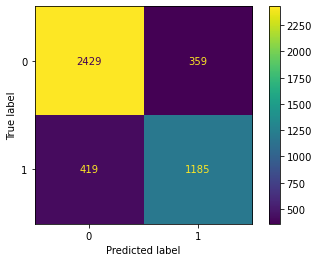

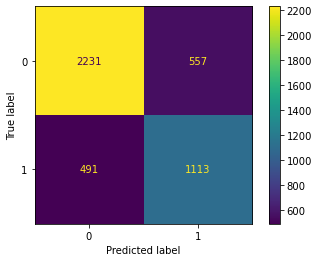

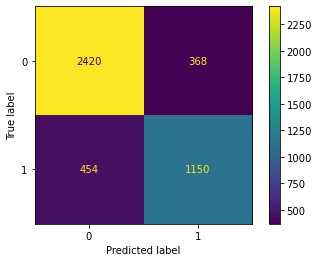

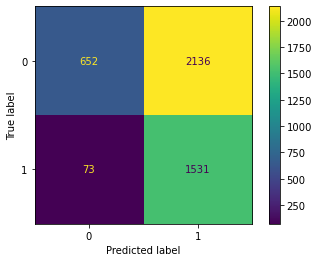

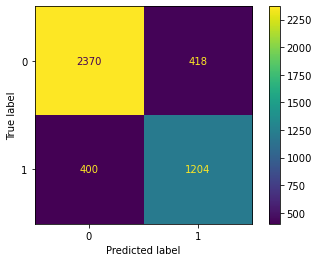

In [30]:
from sklearn import metrics

for classifier in Classifiers:
    model = classifier.fit(train_features,y_train)
    pred = model.predict(test_features)
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    metrics.plot_confusion_matrix(classifier,  test_features, y_test)
    print(metrics.classification_report(pred, y_test))

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer = TfidfVectorizer()

# vectors = vectorizer.fit_transform([train_clean_tweet, test_clean_tweet])

train_features_tfidf = Vectorizer.fit_transform(X_train)

test_features_tfidf = Vectorizer.transform(X_test)


In [32]:
Vectorizer.vocabulary_

{'americanair': 249,
 'space': 7010,
 'seat': 6639,
 'thank': 7457,
 'pilot': 5719,
 'back': 532,
 'mn': 4835,
 'earli': 2151,
 'ohar': 5333,
 'think': 7507,
 'possibl': 5836,
 'sna': 6924,
 'ord': 5416,
 'unit': 7924,
 'chang': 1177,
 'fee': 2547,
 'exact': 2396,
 'flight': 2648,
 'atl': 437,
 'hou': 3451,
 'charg': 1187,
 'math': 4624,
 'add': 81,
 'usairway': 8029,
 'worst': 8481,
 'experi': 2432,
 'ever': 2377,
 'unabl': 7861,
 'help': 3297,
 'phone': 5700,
 'told': 7621,
 'last': 4225,
 'min': 4775,
 'cabin': 1013,
 'crew': 1594,
 'unavail': 7872,
 'never': 5053,
 'book': 815,
 'reserv': 6303,
 'go': 3025,
 'check': 1208,
 'find': 2592,
 'wtf': 8522,
 'southwestair': 6998,
 'okay': 5348,
 'sign': 6798,
 'ye': 8615,
 'dull': 2122,
 'need': 5026,
 'deliv': 1809,
 'embassi': 2242,
 'suit': 7229,
 'herndon': 3315,
 'va': 8071,
 'still': 7135,
 'chicago': 1224,
 'fiasco': 2573,
 'lax': 4250,
 'fli': 2645,
 'delta': 1812,
 'sinc': 6817,
 'plane': 5749,
 'get': 2952,
 'stuck': 7198,
 'dr

In [33]:
print("Total unique words:", len(Vectorizer.vocabulary_))

print("Type of train_features:", type(train_features_tfidf))

print("Shape of input data", test_features_tfidf.shape)

Total unique words: 8767
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4392, 8767)


Accuracy of LogisticRegression is 0.8217213114754098
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3007
           1       0.69      0.80      0.74      1385

    accuracy                           0.82      4392
   macro avg       0.79      0.81      0.80      4392
weighted avg       0.83      0.82      0.82      4392

Accuracy of DecisionTreeClassifier is 0.7292805100182149
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2701
           1       0.66      0.62      0.64      1691

    accuracy                           0.73      4392
   macro avg       0.71      0.71      0.71      4392
weighted avg       0.73      0.73      0.73      4392

Accuracy of RandomForestClassifier is 0.8073770491803278
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      3124
           1       0.63      0.80      0.71      1268

    accuracy   

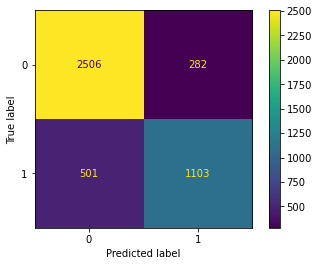

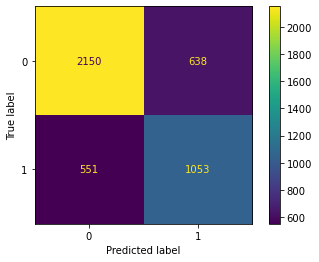

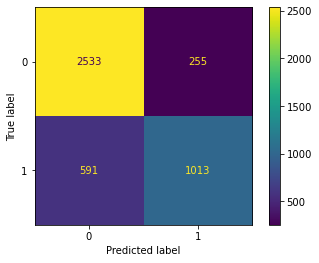

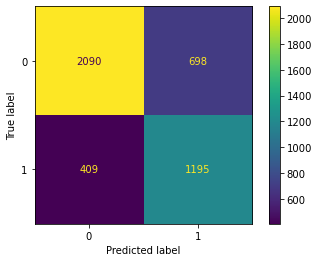

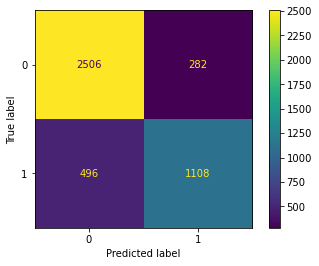

In [34]:
from sklearn import metrics
for classifier in Classifiers:
    model = classifier.fit(train_features_tfidf,y_train)
    pred = model.predict(test_features_tfidf)
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    metrics.plot_confusion_matrix(classifier,  test_features_tfidf, y_test)
    print(metrics.classification_report(pred, y_test))